<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>
<script type="text/x-mathjax-config">
  MathJax.Hub.Config({ TeX: { extensions: ["siunitx.js"] }});
</script>
# Versuchsprotokoll Experiment 234 PAP2: Lichtquellen
Leonard Scheuer

## Motivation
Hier sollen Lichtspektren verschiedener Lichtquellen und das Sonnenlicht untersucht werden. Daraus können über Spektrallinien Aussagen über den Aufbau der Lichtquellen sowie Zusammensetzung der Athmosphäre und Sonne im letzteren Fall gewonnen werden. 

## Grundlagen und Einleitung
Wir wollen zunächst betrachten, auf welcher Grundlage elektromagnetische Strahlung im gemessenen Wellenlängenbereich entsteht. Dazu betrachten wir zunächst Temperaturstrahler und Streueffekte.

### Temperaturstrahler
Jeder Objekt mit von Null verschiedener Temperatur $T$ sendet Strahlung aus, betrachten wir einen Schwarzkörper (der alle einfallende Strahlung zunächst absorbiert), wird diese durch das Planck'sche Strahlungsgesetz beschrieben. Sei $dA$ ein Flächenelement des Schwarzkörpers und $[\lambda,\lambda + d \lambda]$ das betrachtete Wellenlängenintervall, so besagt es für die Strahlungsleistung $M_\lambda$:
\begin{align}
    M_\lambda(\lambda, T)\: d A d \lambda &= \frac{2\pi h c^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}d A d \lambda \label{eq:PSG}
\end{align}
Ist $\lambda_{\max}$ die Wellenlänge, an welcher $M_\lambda$ Maximal wird, dann besagt das Wiensche Verschiebungsgesetz:
\begin{align}
    \lambda_{\max} = \frac{2.8978 K \cdot nm}{T}
\end{align}

### Nichttemperaturstrahler
Durch direkte Anregung eines Elektrons lässt sich ebenfalls eine Lichtemission hervorrufen, wenn dieses wieder in einen Zustand mit niedriger Energie zurück fällt. Da die Energiezustände im allgemeinen quantisiert sind, ist das daraus entstehende Spektrum wieder diskret. Auf ähnliche Weise kann ein Photon bei einer Elketron-Loch-Rekombination abgegeben werden. Bei Leuchtmitteln, die auf einem dieser Prinzipien basieren, wie LEDs, wird gelegntlich noch eine foureszierende Überzug eingesetzt, der die diskret verteilten Photonen aufnimmt und über einen weiteren Bereich verteilt, ggf. in den sichtbaren Bereich verschiebt und wieder abgibt.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

lamb_og, inten_og = np.loadtxt('himmel_o_g.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float},
comments = '>', unpack = True)

lamb_mg, inten_mg = np.loadtxt('himmel_m_g.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float},
comments = '>', unpack = True)

## Auswertung
### Sonnenlichtsprektrum
Wir betrachten das gemessenen Sonnenspektrum einmal direkt und einmal durch ein Fenster im nachfolgenden Diagramm A1. 


(250.0, 900.0)

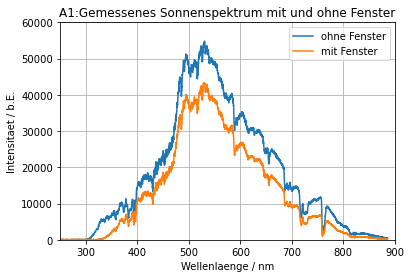

In [2]:
plt.plot(lamb_og, inten_og, label='ohne Fenster')
plt.plot(lamb_mg, inten_mg, label='mit Fenster')
plt.title('A1:Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.legend()
plt.grid()
plt.ylim((0, 60000))
plt.xlim((250, 900))
#plt.savefig("figures/Himmel_m_o_G.pdf", format="pdf")

#### Absorptionsspektrum von Fensterglas
Wir errechen durch den vergleich der beiden Spektren ein Absorptionssprektrum des Fensterglases (Diag. A2). Die Absorption berechenet sich gemäß: 

\begin{equation}
A=\frac{\text{Intensität mit Fenster}}{\text{Intensität ohne Fenster}}
\end{equation}


(320.0, 800.0)

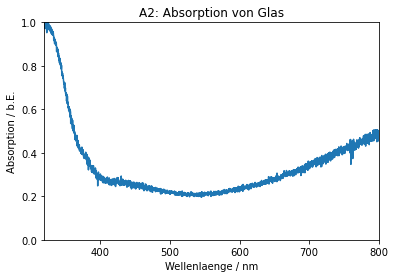

In [3]:
A = 1 - inten_mg / inten_og
plt.plot(lamb_mg, A)
plt.title('A2: Absorption von Glas')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Absorption / b.E.')
plt.ylim((0, 1))
plt.xlim((320, 800))
#plt.savefig("figures/Absorption_Glas.pdf", format="pdf")

#### Fraunhoferlinien
Wir nehmen nun das unverfälschte Sonnelichtspektrum auf und stellen es Interaktiv dar, um darin auffällige dips zu bestimmen. Diese lassen wir anschließend in das Diagramm A3 als Linien zeichen. Zudem nehmen wir diese Tabellarisch mit Fehler auf (die Einheit ist für wellenlängen im Folgenden immer nm, zur Datenanalyse wäre das ständige Angeben der Einheit hinderlich gewesen, daher vereinbaren wir hier diese Konvention).

In [4]:
%%html 
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

In [5]:
%matplotlib widget
plt.plot(lamb_og, inten_og)
plt.title('A3: Sonnenspektrum')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.ylim((0, 60000))
plt.xlim((350, 800))
plt.grid()


#Importiere abgelesene Peaks zur Darstellung
fraunhofer_exp = pd.read_csv("fraunhofer_exp.csv")

err=(fraunhofer_exp["wavel"]-fraunhofer_exp["Half-life"]).abs()
fraunhofer_exp = fraunhofer_exp.drop('Half-life', 1)
fraunhofer_exp["wavel"]=fraunhofer_exp["wavel"]
fraunhofer_exp["error"]=err
#print(fraunhofer_exp)

#fraunhofer = np.loadtxt('fraunhofer_linien.txt') #Ermittelte Wellenlängen der Fraunhofer-Linien
for l in fraunhofer_exp["wavel"]:
   plt.plot([l, l], [0, 60000], color = "black", label = '{0}nm'.format(l))
#plt.savefig("figures/Fraunhofer.pdf", format="pdf")

print(fraunhofer_exp.round(2))



fraunhofer_exp.to_csv("out_fraunhofer_exp.csv")



ModuleNotFoundError: No module named 'ipympl'

Wir vergleichen die Werte mit den Literaturwerten, soweit zuordbar, die Literaturwerte wurden dem Script entnommen:

In [6]:
#Literaturvergleich
fraunhofer_lit = pd.read_csv("fraunhofer_lit.csv")

exp_l=pd.Series([],dtype="float64")
exp_l_error=pd.Series([],dtype="float64")
for n in range(0,len(fraunhofer_lit["element"])):
    for k in range(0,len(fraunhofer_exp["wavel"])):
        if abs(fraunhofer_lit.at[n,"lit_l"]-fraunhofer_exp.loc[k,"wavel"])<0.9*(fraunhofer_exp.loc[k,"error"]):
            exp_l[n]=fraunhofer_exp.loc[k,"wavel"]
            exp_l_error[n]=fraunhofer_exp.loc[k,"error"]
fraunhofer_lit["exp_l"]=exp_l
fraunhofer_lit["exp_l_error"]=exp_l_error


sigma=pd.Series([],dtype="float64")
for i in range(0,len(fraunhofer_lit["element"])):
    sigma[i]=abs((fraunhofer_lit.loc[i,"lit_l"]-fraunhofer_lit.loc[i,"exp_l"])/fraunhofer_lit.loc[i,"exp_l_error"])

fraunhofer_lit["sigma"]=sigma


#Zeichne gefundenen Linien in rot ein
for l in fraunhofer_lit["exp_l"]:
   plt.plot([l, l], [0, 60000], color = "red", label = '{0}nm'.format(l))

print(fraunhofer_lit.round(2))
fraunhofer_lit.to_csv("out_fraunhofer_lit.csv")

NameError: name 'fraunhofer_exp' is not defined

Wir sehen, dass der Messwert um 588.6nm mehrfach zugeordnet wurd, da es zu den in der Umgebung liegenden Fraunhoferlinien keine besseren Entsprechungen gibt, ist unklar woher sich dieser Messwert tatsächlich ergibt, da alle drei Werte weniger als ein Sigam verschoben sind, handelt es sich vermutlich um eine Überlagerung der drei Linien.

#### Balmer-Serie
Wir vergleichen die Balmer-Serie mit den gemessenen Werten, soweit zuordbar, die Literaturwerte wurden dem Script entnommen:

In [84]:
#balmer

balmer_lit = pd.read_csv("balmer_lit.csv")

exp_l=pd.Series([],dtype="float64")
exp_l_error=pd.Series([],dtype="float64")
for n in range(0,len(balmer_lit["lit_l"])):
    for k in range(0,len(fraunhofer_exp["wavel"])):
        if abs(balmer_lit.at[n,"lit_l"]-fraunhofer_exp.loc[k,"wavel"])<0.9*(fraunhofer_exp.loc[k,"error"]):
            exp_l[n]=fraunhofer_exp.loc[k,"wavel"]
            exp_l_error[n]=fraunhofer_exp.loc[k,"error"]
balmer_lit["exp_l"]=exp_l
balmer_lit["exp_l_error"]=exp_l_error


sigma=pd.Series([],dtype="float64")
for i in range(0,len(balmer_lit["lit_l"])):
    sigma[i]=abs((balmer_lit.loc[i,"lit_l"]-balmer_lit.loc[i,"exp_l"])/balmer_lit.loc[i,"exp_l_error"])

balmer_lit["sigma"]=sigma


#Zeichne gefundenen Linien in green ein
for l in balmer_lit["exp_l"]:
   plt.plot([l, l], [0, 60000], color = "green", label = '{0}nm'.format(l))

print(balmer_lit.round(2))
balmer_lit.to_csv("out_balmer_lit.csv")

   lit_l  exp_l  exp_l_error  sigma
0  656.3  655.0          2.0   0.65
1  486.1  486.0          1.5   0.07
2  434.0    NaN          NaN    NaN
3  410.1    NaN          NaN    NaN


### Na-Dampflampe
Wir lesen zunächst aus Messungen bei unterschiedlicher Intensität und passenden Wellenlängenbereichen peaks aus den Diagrammen A4-6 ab und stellen anschließend eben diese in diesen dar:

In [88]:
#Importiere abgelesene Peaks zur Darstellung
na_lines = pd.read_csv("na1_lines.csv")
err=(na_lines["wavel"]-na_lines["Half-life"]).abs()
na_lines = na_lines.drop('Half-life', 1)
na_lines["wavel"]=na_lines["wavel"]
na_lines["error"]=err

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
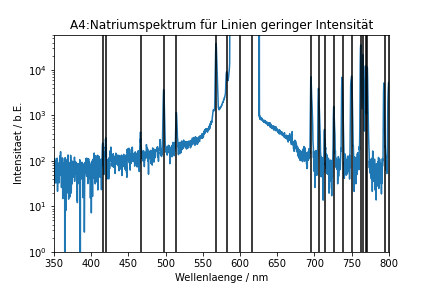

In [86]:
%matplotlib widget
lamb_na1, inten_na1 = np.loadtxt('na1.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_na1, inten_na1)
plt.title('A4:Natriumspektrum für Linien geringer Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((1,60000))
plt.xlim((350, 800))
for l in na_lines["wavel"]:
    plt.plot([l, l], [1, 60000], color = "black", label = '{0}nm'.format(l))
#for l in na_series["exp_l"]:
 #   plt.plot([l, l], [1, 60000], color = "red", label = '{0}nm'.format(l))    
    
    

Hier sind auch die bei geringerer Aufnahmeintensität abgelesenen Linien eingezeichnet, daher sind hier noch nicht zwangsläufig alle Peaks sichtbar. 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
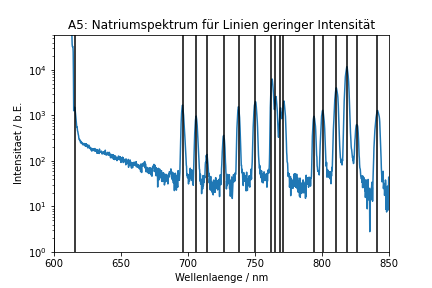

In [87]:
%matplotlib widget
lamb_na1, inten_na1 = np.loadtxt('na2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_na1, inten_na1)
plt.title('A5: Natriumspektrum für Linien geringer Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((1,60000))
plt.xlim((600, 850))
for l in na_lines["wavel"]:
    plt.plot([l, l], [1, 60000], color = "black", label = '{0}nm'.format(l))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
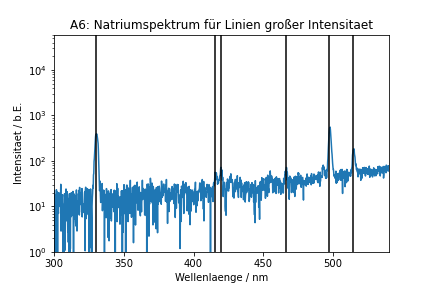

In [89]:
%matplotlib widget
lamb_na2, inten_na2 = np.loadtxt('na2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_na2, inten_na2)
plt.title('A6: Natriumspektrum für Linien großer Intensitaet')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((1,60000))
plt.xlim((300,540))
for l in na_lines["wavel"]:
    plt.plot([l, l], [1, 60000], color = "black", label = '{0}nm'.format(l))

Wir lesen die Peaks aus den Diagrammen ab, wobei wir den Fehler über die Halbwertsbreite abgelesen haben.  Wir erhalten:

In [56]:
na_lines = pd.read_csv("na1_lines.csv")
err=(na_lines["wavel"]-na_lines["Half-life"]).abs()
na_lines = na_lines.drop('Half-life', 1)
na_lines["wavel"]=na_lines["wavel"]
na_lines["error"]=err

print(na_lines)
na_lines.to_csv("out_na_lines.csv")
#print(err)

    wavel  error
0   330.1    1.8
1   497.4    1.8
2   466.3    1.3
3   419.6    2.2
4   415.5    1.0
5   514.4    1.2
6   567.8    1.8
7   582.0    1.1
8   600.0    8.0
9   615.5    1.5
10  696.0    2.2
11  706.2    1.7
12  714.0    1.3
13  726.7    1.1
14  737.8    1.7
15  749.9    1.9
16  762.2    1.5
17  765.0    1.7
18  768.7    0.8
19  771.3    1.1
20  794.3    0.7
21  800.8    1.9
22  810.8    2.5
23  818.9    2.1
24  826.1    2.1
25  841.0    3.0


### Linien der 1.Nebenserie

Wir berechnen $E_{3p}$ aus dem Peak bei 818.9nm mit Fehler:

\begin{equation}
    h\cdot \frac{c}{\lambda_m} = E_\text{Ry} - E_{3p}
\end{equation}

In [90]:
E_3p=(-13.605/(3**2))-1.2398E3/818.9
Delta_E_3p=(1.2398E3/818.9**2)*2.1
print("E_3p= " + str(round(E_3p, 3)))
print("Delta_E_3p= "+ str(round(Delta_E_3p, 3)))

E_3p= -3.026
Delta_E_3p= 0.004


Wir erstellen eine Tabelle über die verscheidenen Wellenlängen und ordnen die experimentell ermittelten Wellenlängen zu, wenn kleiner als beide Fehler addiert sind (Abschätzung, die Tabelle wurde visuell auf plausibilität geprüft):

In [91]:
ms=pd.Series(range(3,13))
na_serie1 = pd.DataFrame(
    {
        "serie":pd.Series(["1.nS","1.nS","1.nS","1.nS","1.nS","1.nS","1.nS","1.nS","1.nS","1.nS",]),
        "m": ms,
        "theoretical_l":ms.apply(lambda x:1.2398E3/(-13.605/x**2-E_3p)),
        "theo_l_error":ms.apply(lambda x:1.2398E3/((-13.605/x**2-E_3p)**2)*Delta_E_3p)
    }
)

exp_l=pd.Series([],dtype="float64")
exp_l_error=pd.Series([],dtype="float64")
for n in range(0,len(na_serie1["m"])):
    for k in range(0,len(na_lines["wavel"])):
        if abs(na_serie1.at[n,"theoretical_l"]-na_lines.loc[k,"wavel"])<1.5*(na_lines.loc[k,"error"]+na_serie1.at[n,"theo_l_error"]):
            exp_l[n]=na_lines.loc[k,"wavel"]
            exp_l_error[n]=na_lines.loc[k,"error"]
na_serie1["exp_l"]=exp_l
na_serie1["exp_l_error"]=exp_l_error
na_serie1.to_csv("out_na_serie1.csv")
print(na_serie1.round(1))

  serie   m  theoretical_l  theo_l_error  exp_l  exp_l_error
0  1.nS   3          818.9           2.1  818.9          2.1
1  1.nS   4          569.9           1.0  567.8          1.8
2  1.nS   5          499.6           0.8  497.4          1.8
3  1.nS   6          468.2           0.7  466.3          1.3
4  1.nS   7          451.2           0.6    NaN          NaN
5  1.nS   8          440.7           0.6    NaN          NaN
6  1.nS   9          433.8           0.6    NaN          NaN
7  1.nS  10          429.1           0.6    NaN          NaN
8  1.nS  11          425.6           0.6    NaN          NaN
9  1.nS  12          423.0           0.6  419.6          2.2


### 2. Nebenserie
Wir bestimmen $E_{3s}$ aus dem Peak bei 582nm per: 
\begin{align}
E_{3s}=E_{3p}-1,2398 \cdot 10^3 \text{[nm eV]}/\lambda
\end{align}
und den Fehler per Gauß:
\begin{align}
\Delta E_{3s}=\sqrt{ \Delta E_{3p}^2+ ( 1,2398 \cdot 10^3 \text{[nm eV]}/\lambda^2 \Delta \lambda )^2}
\end{align}


In [58]:
E_3s=E_3p-1.2398E3/582
Delta_E_3s=np.sqrt(Delta_E_3p**2+1.2398E3*1.1/(582)**2)
print("E_3s= " + str(round(E_3s,2)))
print("Delta_E_3s= "+ str(round(Delta_E_3s,2)))

E_3s= -5.16
Delta_E_3s= 0.06


Wir bestimmen den Korrekturfaktor:
\begin{align}
 &&E_3s&=-13.605eV/(3-\Delta_s)^2 \\
\therefore && \Delta_s &= 3- \sqrt{-13.605eV/E_{3s}  }\\
\therefore && \Delta \Delta_s &= \sqrt{-13.605eV/E_{3s}^{3/2} \Delta E_{3s}  }
\end{align}

In [59]:
korr_s=3-np.sqrt(-13.605/E_3s)
Delta_korr_s= np.sqrt(13.605)/(-E_3s)**(3/2)*Delta_E_3s
print("korr_s= " + str(round(korr_s,2)))
print("Delta_korr_s= "+ str(round(Delta_korr_s,2)))

korr_s= 1.38
Delta_korr_s= 0.02


Wir berechnen wieder die Serie mit der folgenden Formel (und entsprechendem Fehler nach Gauß) und vergleichen wie oben mit den experimentellen Werten:
\begin{align}
\lambda=&\frac{1,2398 \cdot 10^3 \text{[nm eV]}}{-13.605eV/(m-\Delta_s)^2-E_{3p}}\\
\Delta \lambda=&\sqrt{ ( \frac{1,2398 \cdot 10^3 \text{[nm eV]}}{(-13.605eV/(m-\Delta_s)^2-E_{3p})^2} \frac{2}{(m-\Delta_s)^3} \Delta \Delta_s)^2+ (\frac{1,2398 \cdot 10^3 \text{[nm eV]}}{(-13.605eV/(m-\Delta_s)^2-E_{3p})^2} \Delta E_{3p})^2}
\end{align}


In [92]:
ms=pd.Series(range(4,10))
na_serie2 = pd.DataFrame(
    {
        "serie": pd.Series(["2.nS","2.nS","2.nS","2.nS","2.nS","2.nS"]),
        "m": ms,
        "theoretical_l":ms.apply(lambda x:1.2398E3/(-13.605/(x-korr_s)**2-E_3p)),
        "theo_l_error":ms.apply(lambda x:1.2398E3/((-13.605/(x-korr_s)**2-E_3p)**2)*np.sqrt((Delta_E_3p**2)+(2/((x-korr_s)**3)*Delta_korr_s)**2))
    }
)

exp_l=pd.Series([],dtype="float64")
exp_l_error=pd.Series([],dtype="float64")

for n in range(0,len(na_serie2["m"])):
    for k in range(0,len(na_lines["wavel"])):
        if abs(na_serie2.at[n,"theoretical_l"]-na_lines.loc[k,"wavel"])<3*(na_lines.loc[k,"error"]+na_serie2.at[n,"theo_l_error"]):
            exp_l[n]=na_lines.loc[k,"wavel"]
            exp_l_error[n]=na_lines.loc[k,"error"]
            
na_serie2["exp_l"]=exp_l
na_serie2["exp_l_error"]=exp_l_error


print(na_serie2.round(1))
na_serie2.to_csv("out_na_serie2.csv")

  serie  m  theoretical_l  theo_l_error  exp_l  exp_l_error
0  2.nS  4         1180.4           5.0    NaN          NaN
1  2.nS  5          623.0           1.2  615.5          1.5
2  2.nS  6          518.9           0.8  514.4          1.2
3  2.nS  7          477.7           0.7    NaN          NaN
4  2.nS  8          456.5           0.7    NaN          NaN
5  2.nS  9          444.1           0.6    NaN          NaN


### Hauptserie

Wir bestimmen $\Delta_p$ mit Fehler nach Gauß:
\begin{align}
 && \Delta_p &= 3- \sqrt{-13.605eV/E_{3p}  }\\
 && \Delta \Delta_p &= \sqrt{-13.605eV/E_{3p}^{3/2} \Delta E_{3p}  }
\end{align}


In [65]:
korr_p=3-np.sqrt(-13.605/E_3p)
Delta_korr_p= np.sqrt(13.605)/(-E_3s)**(3/2)*Delta_E_3p
print("korr_s= " + str(korr_p.round(3)))
print("Delta_korr_s= "+ str(Delta_korr_p.round(4)))

korr_s= 0.879
Delta_korr_s= 0.0012


Wir berechnen wieder (vollkommen analog zu oben) die Serie mit der folgenden Formel (und entsprechendem Fehler nach Gauß) und vergleichen wie oben mit den experimentellen Werten:
\begin{align}
\lambda=&\frac{1,2398 \cdot 10^3 \text{[nm eV]}}{-13.605eV/(m-\Delta_p)^2-E_{3s}}\\
\Delta \lambda=&\sqrt{ ( \frac{1,2398 \cdot 10^3 \text{[nm eV]}}{(-13.605eV/(m-\Delta_p)^2-E_{3s})^2} \frac{2}{(m-\Delta_p)^3} \Delta \Delta_p)^2+ (\frac{1,2398 \cdot 10^3 \text{[nm eV]}}{(-13.605eV/(m-\Delta_p)^2-E_{3p})^2} \Delta E_{3s})^2}
\end{align}


In [66]:
ms=pd.Series(range(4,6))
na_serie3 = pd.DataFrame(
    {
        "serie":pd.Series(["Hauptserie","Hauptserie"]).repeat(1),
        "m": ms,
        "theoretical_l":ms.apply(lambda x:1.2398E3/(-13.605/(x-korr_p)**2-E_3s)),
        "theo_l_error":ms.apply(lambda x:1.2398E3/((-13.605/(x-korr_p)**2-E_3s)**2)*np.sqrt((Delta_E_3s**2)+(2/((x-korr_p)**3)*Delta_korr_p)**2))
    }
)

exp_l=pd.Series([],dtype="float64")
exp_l_error=pd.Series([],dtype="float64")
for n in range(0,len(na_serie3["m"])):
    for k in range(0,len(na_lines["wavel"])):
        if abs(na_serie3.at[n,"theoretical_l"]-na_lines.loc[k,"wavel"])<3*(na_lines.loc[k,"error"]+na_serie3.at[n,"theo_l_error"]):
            exp_l[n]=na_lines.loc[k,"wavel"]
            exp_l_error[n]=na_lines.loc[k,"error"]
na_serie3["exp_l"]=exp_l
na_serie3["exp_l_error"]=exp_l_error

print(na_serie3.round(1))
na_serie3.to_csv("out_na_serie3.csv")

        serie  m  theoretical_l  theo_l_error  exp_l  exp_l_error
0  Hauptserie  4          329.8           5.6  330.1          1.8
1  Hauptserie  5          284.7           4.2    NaN          NaN


Wir fassen die zuordbaren Linien zusammen und betrachten die Abweichungen:

In [68]:
na_series=pd.concat([na_serie1,na_serie2,na_serie3],ignore_index=True, sort=False)

sigma=pd.Series([],dtype="float64")
for i in range(0,len(na_series["m"])):
    sigma[i]=abs(na_series.loc[i,"theoretical_l"]-na_series.loc[i,"exp_l"])/np.sqrt(na_series.loc[i,"theo_l_error"]**2+na_series.loc[i,"exp_l_error"]**2)

na_series["sigma"]=sigma

counts=na_series.count(1)
for i in range(0,len(na_series["m"])):
    if counts.loc[i]<5:
           na_series=na_series.drop(labels=i, axis=0)
            
print(na_series.round(2))
na_series.to_csv("out_na_series_overview.csv")

         serie   m  theoretical_l  theo_l_error  exp_l  exp_l_error  sigma
0         1.nS   3         818.90          2.10  818.9          2.1   0.00
1         1.nS   4         569.93          1.02  567.8          1.8   1.03
2         1.nS   5         499.63          0.78  497.4          1.8   1.14
3         1.nS   6         468.25          0.69  466.3          1.3   1.33
9         1.nS  12         422.97          0.56  419.6          2.2   1.48
11        2.nS   5         623.02          1.24  615.5          1.5   3.86
12        2.nS   6         518.86          0.85  514.4          1.2   3.04
16  Hauptserie   4         329.85          5.58  330.1          1.8   0.04


In Diag. A7 sind alle gefundenen Peaks dargestellt, diejenigen, welche sich zuordnen ließen, sind rot eingefärbt. 

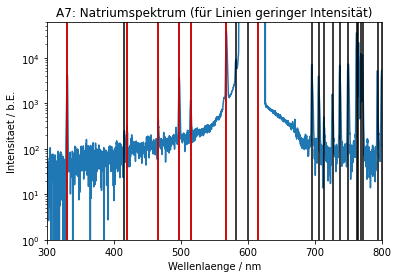

In [93]:
%matplotlib inline
lamb_na1, inten_na1 = np.loadtxt('na1.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_na1, inten_na1)
plt.title('A7: Natriumspektrum (für Linien geringer Intensität)')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.ylim((1,60000))
plt.xlim((300, 800))
for l in na_lines["wavel"]:
    plt.plot([l, l], [1, 60000], color = "black", label = '{0}nm'.format(l))
for l in na_series["exp_l"]:
    plt.plot([l, l], [1, 60000], color = "red", label = '{0}nm'.format(l))    
    
    